# [Computer Vision] Assignment #2

본 과제의 목적은 k-means clsutering 구현을 목표로 함.

* k-means clustering은 비지도학습의 한 종류로써, 사전에 정의된 클러스터 갯수 K와 초기값에 의해 데이터의 cluster 할당을 반복적으로 업데이트하는 알고리즘임.
* k-means clsutering 을 from scratch 로 구현하고, scikit-learn 의 결과와 비교함.
* 구현에 필요한 코드, 패키지, 파라미터, 함수 등을 skeleton code에 추가하여 사용 가능함.
* max_iterations 변화에 따른 clsutering 결과 양상 변화 확인
* tolerance 변화에 따른 clustering 결과 양상 변화 확인

## 1. K-means clustering from scratch (40 points)

In [3]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

class K_Means:
    # 클래스 생성자 구현 (2 points)
    # k: cluster 의 수
    # tolerance: 허용오차
    # (t-1 번째 clsuter centers 와 t 번째 clsuter centers 사이의 Euclidean 거리;
    # 해당 값 이하에서 iteration 중단)
    # max_iterations: 최대 iteration 횟수
    # 추가적으로 필요한 파라미터 자유롭게 설정
    k = None
    tolerance = None
    max_iterations = None
    def __init__(self, k=2, tolerance = 0.001, max_iterations = 500):
      self.k = k
      self.tolerance = tolerance
      self.max_iterations = max_iterations

    # 거리 함수 구현 (3 points)
    # 두 벡터를 받아, Euclidean 거리를 리턴
    def euclidean_distance(self, point1, point2):
      if type(point1):
        point1_np = np.array(point1)
      else:
        point1_np = point1

      if type(point2):
        point2_np = np.array(point2)
      else:
        point2_np = point2

      dist = np.linalg.norm(point2_np-point1_np)
      return dist


    # fitting 함수 구현
    # E-step 과 M-step 을 반복하며 cluster centers를 찾는 과정
    def fit(self, data):
        # cluster centers 초기화 (5 points)
        # 각자의 방식으로 cluster centers 할당
        # (예. 특정 데이터 포인트, 랜덤 등)

        ## 신소정 ** Forgy 방식의 Random Center 선정
        cluster_center = np.array([[]])
        numbers = np.random.choice(range(0, len(data)), self.k, replace=False) ## 겹치지 않도록 range 범위 내 k개의 난수 발생
        cluster_center = np.array([data[i] for i in numbers])

        # max_iterations 까지 반복
        clusted_matrix_hist = list()
        cluster_center_hist = list()

        for i in range(self.max_iterations):
            # E-step 구현 (5 points)
            # 모든 데이터에 대해 cluster centers 와의 거리를 비교하고 가장 가까운 center로 label 할당
          clusted_matrix = list([])
          for pIdx, point in enumerate(data): ## data 개수 만큼 반복
            minVal = np.inf
            minIdx = 0
            for cIdx, center in enumerate(cluster_center):
              dist = self.euclidean_distance(point, center)
              if dist < minVal:
                minVal = dist
                minIdx = cIdx
            clusted_matrix.append(np.array([pIdx, minIdx]))

            # M-step 구현 (5 points)
            # t-1 번째 cluster centers를 저장해두고,
            # E-step에서 할당된 label을 이용하여 새롭게 cluster centers를 갱신
          cluster_center_prv = np.copy(cluster_center)
          update_center_sum = np.zeros([self.k, 2])
          update_center_count = np.zeros(self.k)

          cluster_center_hist.append(cluster_center_prv) ## 이전 것으로 넣는 이유는 clusted_matrix가 prv에 저장된 center점에 의해서 구분되었기 때문
          clusted_matrix_hist.append(clusted_matrix)

          for pIdx, cIdx in clusted_matrix: # pIdx : point index, cIdx : closest center index to this point
            update_center_sum[cIdx][0] += data[pIdx][0]
            update_center_sum[cIdx][1] += data[pIdx][1]
            update_center_count[cIdx] += 1

          cluster_center[:,0] = update_center_sum[:, 0]/update_center_count ## 새로운 center 갱신
          cluster_center[:,1] = update_center_sum[:, 1]/update_center_count

            # 수렴 확인 (5 points)
            # 새롭게 갱신된 cluster centers에 대해,
            # 이전의 cluster centers와의 Euclidean 거리를 비교하여
            # tolerance 보다 작은 경우 알고리즘을 마침
            # 그렇지 않으면 max_iterations까지 알고리즘 수행
          cnt = 0
          for j in range(self.k):
            dist = self.euclidean_distance(cluster_center[j, :], cluster_center_prv[j, :])
            if dist < self.tolerance:
              cnt += 1
          if cnt == self.k:
            break

        return cluster_center_hist, clusted_matrix_hist

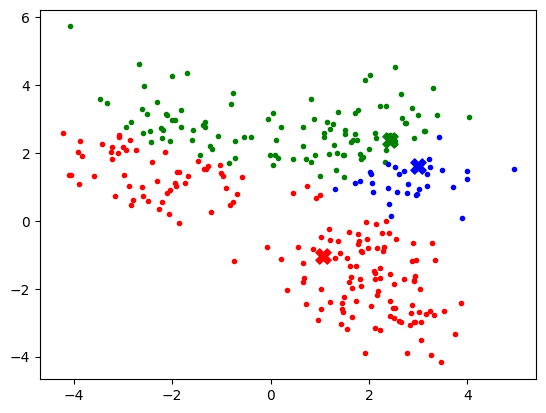

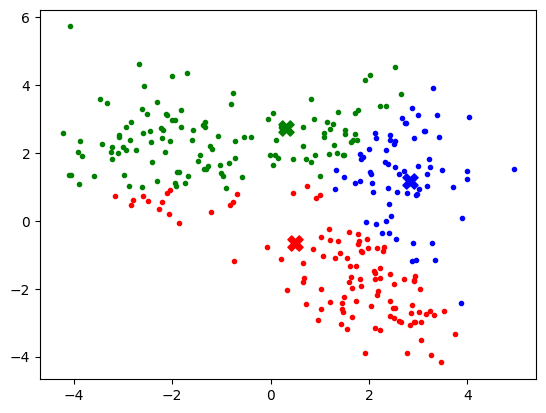

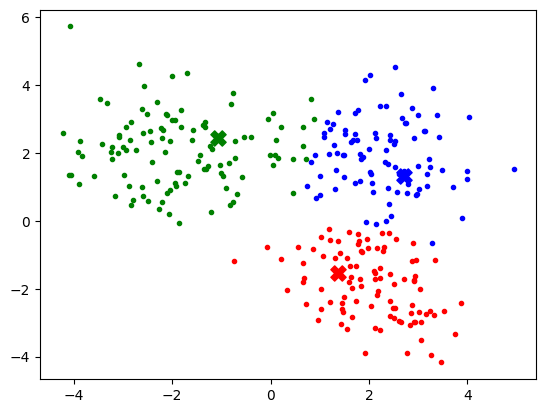

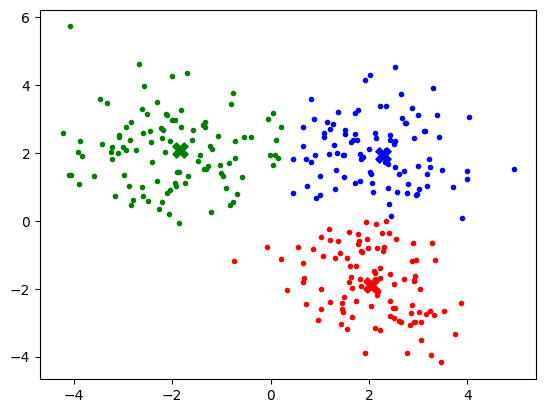

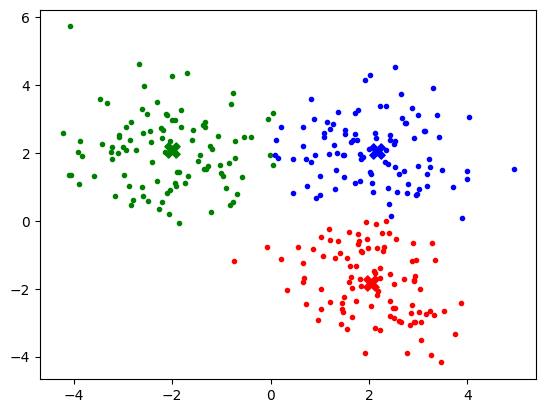

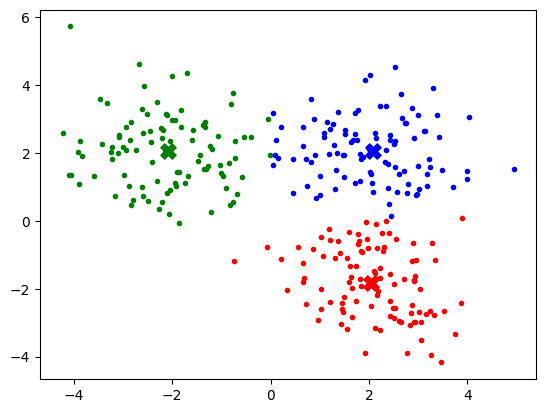

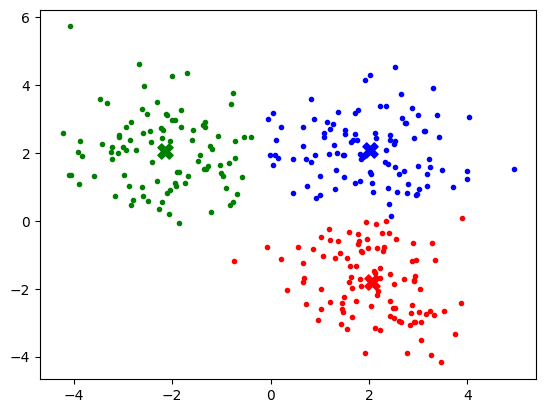

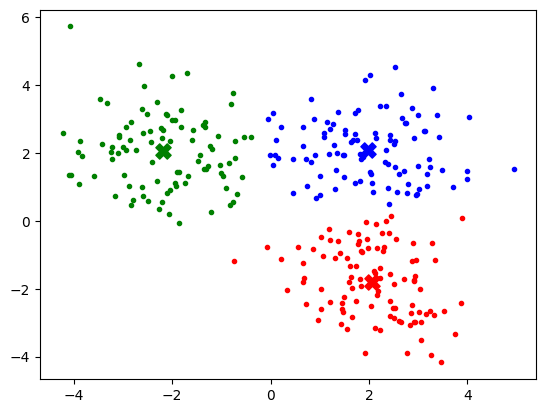

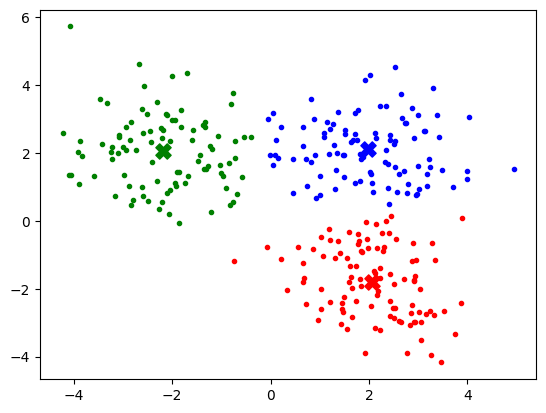

In [4]:
# cluster 수 (k) 및 clueter centers 초기화 (5 points)
# cluster 수는 3개로 설정
# 생성할 2차원 데이터 분포의 centers는 자유롭게 설정
# (예, (1, 1), (9, 1), (5, 5))
k=3
center_1 = np.array([2, 2])
center_2 = np.array([2, -2])
center_3 = np.array([-2, 2])


# 설정한 center 중심으로 Gaussian 분포를 따르는 데이터 생성 (4 points)
# np.random.randn 활용
# 각 cluster 별 100개씩 생성
sigma = 1
cluster_1 = center_1 + sigma*(np.random.randn(100, 2))
cluster_2 = center_2 + sigma*(np.random.randn(100, 2))
cluster_3 = center_3 + sigma*(np.random.randn(100, 2))
#print("culster1", cluster_1)
#print("culster2", cluster_2)
#print("culster3", cluster_3)

np.shape(cluster_1)

# 생성한 데이터를 모두 합쳐서 하나의 형태로 변형 (1 points)
data = np.concatenate((cluster_1, cluster_2, cluster_3), axis=0)


# 구현한 k-means 알고리즘 적용
k_means = K_Means(k=3, tolerance=0.0001, max_iterations=500)
cluster_center_hist, clusted_matrix_hist = k_means.fit(data)

# clustering 결과 시각화 (5 points)
for cluster_center, clusted_matrix in zip(cluster_center_hist, clusted_matrix_hist):
  for pIdx, cIdx in clusted_matrix:
    if cIdx == 0:
      plt.scatter(data[pIdx, 0], data[pIdx, 1], marker=".", c="r")
    elif cIdx == 1:
      plt.scatter(data[pIdx, 0], data[pIdx, 1], marker=".", c="g")
    else:
      plt.scatter(data[pIdx, 0], data[pIdx, 1], marker=".", c="b")
  plt.scatter(cluster_center[0][0], cluster_center[0][1], marker="X", c="r",s=120)
  plt.scatter(cluster_center[1][0], cluster_center[1][1], marker="X", c="g",s=120)
  plt.scatter(cluster_center[2][0], cluster_center[2][1], marker="X", c="b",s=120)
  plt.pause(0.1)



## 2. K-means clustering with scikit-learn (10 points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


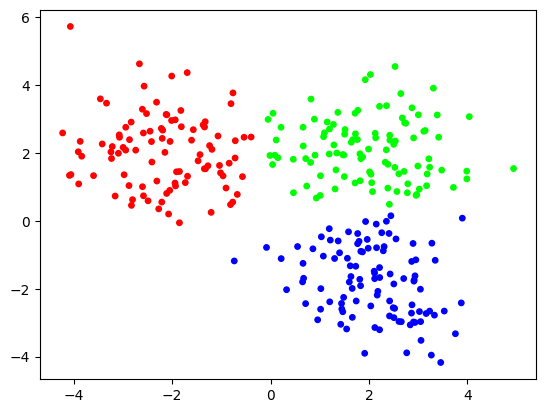

In [14]:
from sklearn.cluster import KMeans


# scikit-learn을 통한 확인 (5 points)
# data는 이전에 설정한 데이터와 동일한 데이터 활용
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# 링크 참조하여 작성
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

# clustering 결과 시각화 (5 points)

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='brg', s=15)
plt.show()